# LaMa Inference
Download `big-lama` here:
https://drive.google.com/drive/folders/1B2x7eQDgecTL0oh3LSIBDGj0fTxs6Ips

`big-lama` is the most powerful variant, pre-trained on high-resolution data.

In [1]:
import sys
import os

lama_root = "/lama/saicinpainting"
sys.path.append(lama_root)

In [2]:
import sys
python_exec = sys.executable

In [8]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import subprocess

In [37]:
from PIL import Image
import os

def convert_jpg_to_png(image_path):
    try:
        img = Image.open(image_path)
        # Convert the image to RGB mode if it's not already
        img = img.convert('RGB')
        # Get the file name without extension
        file_name = os.path.splitext(image_path)[0]
        # Save the image as PNG
        img.save(file_name + ".png", "png")
        print(f"Successfully converted {image_path} to {file_name}.png")
    except Exception as e:
        print(f"Error converting {image_path}: {e}")


# Example usage:
image_path = "lama/input/images/crack.png"
convert_jpg_to_png(image_path)

Successfully converted lama/input/images/crack.png to lama/input/images/crack.png


### Inference

Things to prepare:
1. Download big-lama and save to `lama/pretrained`. Files inside must have the following paths:
    * `lama/pretrained/config.yaml`
    * `lama/pretrained/models/best.ckpt`
2. In `configs`, create `predict/predict_config.yml` containing:


model:

    path: /mnt/processed/private/msds2025/cpt2/ML3/FinalProject/Inpainting/lama/pretrained/big-lama

    checkpoint: best.ckpt

indir: /mnt/processed/private/msds2025/cpt2/ML3/FinalProject/Inpainting/lama/input/images

outdir: outputs

refiner: 1

out_key: inpainted

dataset:

    kind: default

    img_suffix: .png

    pad_out_to_modulo: 8


3. Input files must be placed in `lama/input/images`.
    * Inputs must be: `lama/input/images/sample_name_1.png` and `lama/input/images/sample_name_1_mask.png`
    * Make sure that both are `.png`
    * Make sure that `sample_name_1_mask.png` is mode="L"

Via Terminal:

`PYTHONPATH=. python -m bin.predict   --config-path=../configs/predict   --config-name=predict_config.yml`

Via Python script:

In [9]:
import subprocess
import sys
import os

python_exec = sys.executable
lama_path = os.path.join(os.getcwd(), "lama")
abs_model_path = os.path.join(lama_path, "pretrained", "big-lama")

env = os.environ.copy()
env["PYTHONPATH"] = lama_path

result = subprocess.run([
    python_exec, "bin/predict.py",
    f"model.path={abs_model_path}",     # 🔧 ABSOLUTE PATH
    "indir=../input/images",
    "indir_mask=../input/masks",
    "outdir=../output"
], capture_output=True, text=True, cwd="lama", env=env)

print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)
print("Return code:", result.returncode)

STDOUT:
 Detectron v2 is not installed
[2025-06-01 18:54:09,979][saicinpainting.utils][WARNING] - Setting signal 10 handler <function print_traceback_handler at 0x715f3cac9550>
[2025-06-01 18:54:10,010][root][INFO] - Make training model default
[2025-06-01 18:54:10,055][saicinpainting.training.trainers.base][INFO] - BaseInpaintingTrainingModule init called
[2025-06-01 18:54:10,056][root][INFO] - Make generator ffc_resnet
[2025-06-01 18:54:10,665][saicinpainting.training.trainers.base][INFO] - Generator
FFCResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): FFC_BN_ACT(
      (ffc): FFC(
        (convl2l): Conv2d(4, 64, kernel_size=(7, 7), stride=(1, 1), bias=False, padding_mode=reflect)
        (convl2g): Identity()
        (convg2l): Identity()
        (convg2g): Identity()
        (gate): Identity()
      )
      (bn_l): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn_g): Identity()
      (act_l): ReLU(inpla

In [52]:
from PIL import Image

img = Image.open("lama/input/images/crack.png")
print("Image format:", img.format)

mask = Image.open("lama/input/images/crack_mask.png")
print("Mask format:", mask.format)


Image format: PNG
Mask format: PNG


In [50]:
import os
from PIL import Image

image_path = "lama/input/images/crack"

if os.path.isfile(image_path):
    print("File exists.")
    try:
        img = Image.open(image_path)
        print("Image format:", img.format)
        img.verify()  # Verify image integrity
        print("Image is valid.")
    except Exception as e:
        print("File Load Error:", e)
else:
    print("File does not exist.")


File exists.
Image format: PNG
Image is valid.


### Checks

Run code below to check if file exists

In [24]:
import os

# Inside lama/
print("From cwd=lama:")
print("Exists?", os.path.exists("lama/pretrained/big-lama/config.yaml"))

From cwd=lama:
Exists? True


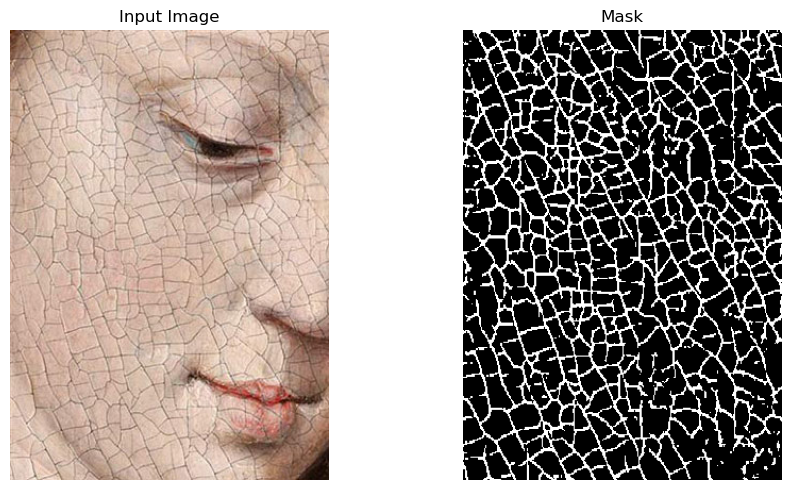

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and convert images to displayable formats
img = Image.open("lama/input/images/mask.png").convert("RGB")
mask = Image.open("lama/input/masks/mask.png").convert("L")  # grayscale mask

# Convert to numpy arrays
img_np = np.array(img)
mask_np = np.array(mask)

# Plot side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_np)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(mask_np, cmap="gray")
ax[1].set_title("Mask")
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [23]:
from PIL import Image

image = Image.open("lama/input/images/mask.png")
mask = Image.open("lama/input/masks/mask.png")

print(f"Image size: {image.size}, mode: {image.mode}")
print(f"Mask size: {mask.size}, mode: {mask.mode}")

Image size: (300, 423), mode: RGB
Mask size: (300, 423), mode: L


In [20]:
import numpy as np
mask = np.array(Image.open("lama/input/masks/mask.png"))
print("Unique values in mask:", np.unique(mask))

Unique values in mask: [  0 255]


In [21]:
from PIL import Image
import numpy as np

# Load original RGB mask
mask_rgb = Image.open("lama/input/masks/mask.png")

# Convert to grayscale ("L" mode)
mask_gray = mask_rgb.convert("L")

# Ensure it's strictly binary (0 or 255)
mask_array = np.array(mask_gray)
binary_mask = (mask_array > 127).astype(np.uint8) * 255

# Save final fixed mask
Image.fromarray(binary_mask).save("lama/input/masks/L_mask.png")